**Módulo 07, Tarefa 01**

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

**1 - Carregue a base e avalie:**

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

In [37]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Carregar a base (ajuste o caminho se necessário)
# Use o caminho fornecido pelo kagglehub
path = '/kaggle/input/credit-card-approval-prediction'
df = pd.read_csv(os.path.join(path, 'application_record.csv'))

# Ver primeiras linhas
display(df.head())

# Ver tipos de dados
print("\n Tipos de dados:")
print(df.dtypes)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0



 Tipos de dados:
ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object


In [57]:
# 3 - Crie variáveis dummy para as variáveis necessárias

# Identificar colunas do tipo 'object' que não são binárias (já que binárias podem ser tratadas como {0, 1})
object_cols = df.select_dtypes(include='object').columns
# Excluir colunas que já podem ser consideradas binárias ou que não são relevantes para dummy
# Neste caso, todas as colunas object, exceto 'OCCUPATION_TYPE' que tem muitos valores,
# podem ser candidatas a dummy, mas vamos verificar suas contagens antes.

# Vamos verificar as variáveis object e suas contagens para decidir quais transformar em dummy
for col in object_cols:
    print(f"\nContagem de valores para a coluna '{col}':")
    print(df[col].value_counts())

# Com base nas contagens, as seguintes colunas object parecem ser adequadas para one-hot encoding (dummy):
# CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE,
# NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, OCCUPATION_TYPE

# Criar variáveis dummy
df_dummies = pd.get_dummies(df, columns=object_cols, drop_first=True) # drop_first=True para evitar multicolinearidade

# Exibir as primeiras linhas do novo dataframe com as variáveis dummy
display(df_dummies.head())

# Exibir as novas colunas criadas # Removido
# print("\nNovas colunas após a criação de variáveis dummy:") # Removido
# print(df_dummies.columns) # Removido


Contagem de valores para a coluna 'CODE_GENDER':
CODE_GENDER
F    294440
M    144117
Name: count, dtype: int64

Contagem de valores para a coluna 'FLAG_OWN_CAR':
FLAG_OWN_CAR
N    275459
Y    163098
Name: count, dtype: int64

Contagem de valores para a coluna 'FLAG_OWN_REALTY':
FLAG_OWN_REALTY
Y    304074
N    134483
Name: count, dtype: int64

Contagem de valores para a coluna 'NAME_INCOME_TYPE':
NAME_INCOME_TYPE
Working                 226104
Commercial associate    100757
Pensioner                75493
State servant            36186
Student                     17
Name: count, dtype: int64

Contagem de valores para a coluna 'NAME_EDUCATION_TYPE':
NAME_EDUCATION_TYPE
Secondary / secondary special    301821
Higher education                 117522
Incomplete higher                 14851
Lower secondary                    4051
Academic degree                     312
Name: count, dtype: int64

Contagem de valores para a coluna 'NAME_FAMILY_STATUS':
NAME_FAMILY_STATUS
Married              

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,5008804,0,427500.0,-12005,-4542,1,1,0,0,2.0,...,False,False,False,False,False,False,False,False,False,False
1,5008805,0,427500.0,-12005,-4542,1,1,0,0,2.0,...,False,False,False,False,False,False,False,False,False,False
2,5008806,0,112500.0,-21474,-1134,1,0,0,0,2.0,...,False,False,False,False,False,False,False,False,True,False
3,5008808,0,270000.0,-19110,-3051,1,0,1,1,1.0,...,False,False,False,False,False,False,True,False,False,False
4,5008809,0,270000.0,-19110,-3051,1,0,1,1,1.0,...,False,False,False,False,False,False,True,False,False,False


In [10]:
# Download latest version
import kagglehub
path = kagglehub.dataset_download("rikdifos/credit-card-approval-prediction")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'credit-card-approval-prediction' dataset.
Path to dataset files: /kaggle/input/credit-card-approval-prediction


In [15]:
# 5 - Salve a base, pois ela será utilizada no final deste módulo.

# Salvar o dataframe final em um arquivo CSV
df_final.to_csv('base_processada.csv', index=False)

print("DataFrame final salvo como 'base_processada.csv'")

DataFrame final salvo como 'base_processada.csv'


**Carregar e Processar credit_record.csv para criar a variável resposta**

**Criar a variável resposta 'mau'**


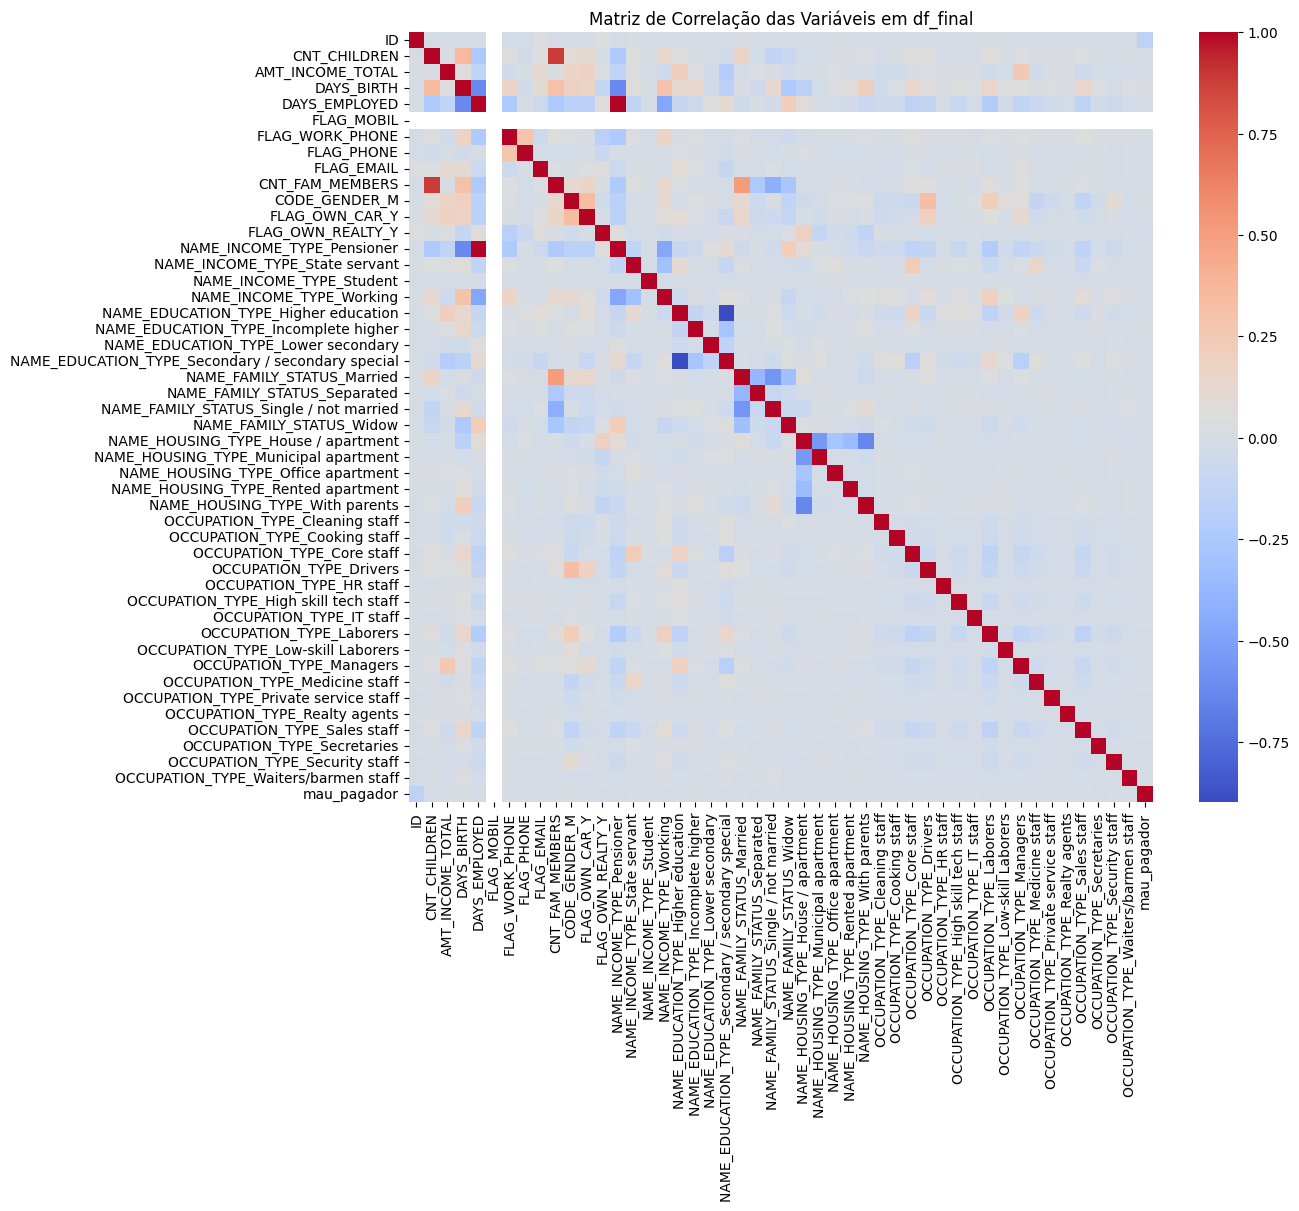


Correlação das variáveis com 'mau_pagador':


,mau_pagador
mau_pagador,1.000000
DAYS_BIRTH,0.008446
NAME_EDUCATION_TYPE_Incomplete higher,0.007901
CODE_GENDER_M,0.006062
NAME_FAMILY_STATUS_Single / not married,0.005738
AMT_INCOME_TOTAL,0.005333
FLAG_WORK_PHONE,0.004724
NAME_HOUSING_TYPE_With parents,0.004582
NAME_HOUSING_TYPE_Rented apartment,0.004306
OCCUPATION_TYPE_Medicine staff,0.004116


In [40]:
# Explorar a correlação entre variáveis em df_final

# Calcular a matriz de correlação
correlation_matrix = df_final.corr()

# Visualizar a matriz de correlação com um heatmap (opcional: ajustar tamanho e máscara para melhor visualização)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Variáveis em df_final')
plt.show()

# Para uma análise mais detalhada, podemos ver as correlações com a variável resposta 'mau_pagador'
print("\nCorrelação das variáveis com 'mau_pagador':")
display(correlation_matrix['mau_pagador'].sort_values(ascending=False))

In [12]:
# Criar a variável 'mau' em credit_df
# STATUS:
# C: paid off that month
# X: No loan for the month
# 0: No overdue
# 1: 1-30 days overdue
# 2: 31-60 days overdue
# 3: 61-90 days overdue
# 4: 91-120 days overdue
# 5: Overdue > 120 days

# Definir 'mau' como 1 se STATUS for 1, 2, 3, 4 ou 5, e 0 caso contrário.
credit_df['mau'] = credit_df['STATUS'].apply(lambda x: 1 if x in ['1', '2', '3', '4', '5'] else 0)

# Verificar a distribuição da variável 'mau'
print("Distribuição da variável 'mau':")
display(credit_df['mau'].value_counts())

# Precisamos agrupar por ID e verificar se algum registro teve 'mau' = 1
# Se um ID teve 'mau' = 1 em algum momento, consideramos ele como mau pagador (mau=1)
mau_por_id = credit_df.groupby('ID')['mau'].max().reset_index()
mau_por_id.rename(columns={'mau': 'mau_pagador'}, inplace=True)

print("\nDistribuição da variável 'mau_pagador' por ID:")
display(mau_por_id['mau_pagador'].value_counts())

Distribuição da variável 'mau':


,count
mau,
0,1034381
1,14194



Distribuição da variável 'mau_pagador' por ID:


,count
mau_pagador,
0,40635
1,5350


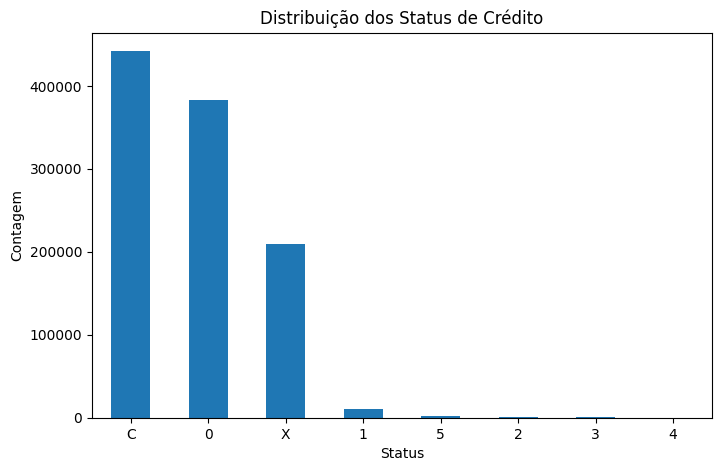

In [48]:
# Gráfico de barras para a distribuição da coluna STATUS
plt.figure(figsize=(8, 5))
credit_df['STATUS'].value_counts().plot(kind='bar')
plt.title('Distribuição dos Status de Crédito')
plt.xlabel('Status')
plt.ylabel('Contagem')
plt.xticks(rotation=0)
plt.show()

In [49]:
# Juntar os dataframes usando o 'ID' como chave
df_final = pd.merge(df_dummies, mau_por_id, on='ID', how='left')

# Preencher IDs que não estão em credit_record com mau_pagador = 0 (assumindo que não são mau pagadores)
df_final['mau_pagador'] = df_final['mau_pagador'].fillna(0) # Corrigido o FutureWa rning

# Verificar as primeiras linhas do dataframe final
print("Primeiras linhas do dataframe final com a variável 'mau_pagador':")
display(df_final.head())

# Verificar a distribuição da variável 'mau_pagador' no dataframe final
print("\nDistribuição da variável 'mau_pagador' no dataframe final:")
display(df_final['mau_pagador'].value_counts())

Primeiras linhas do dataframe final com a variável 'mau_pagador':


,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,mau_pagador
0,5008804,0,427500.0,-12005,-4542,1,1,0,0,2.0,...,False,False,False,False,False,False,False,False,False,1.0
1,5008805,0,427500.0,-12005,-4542,1,1,0,0,2.0,...,False,False,False,False,False,False,False,False,False,1.0
2,5008806,0,112500.0,-21474,-1134,1,0,0,0,2.0,...,False,False,False,False,False,False,False,True,False,0.0
3,5008808,0,270000.0,-19110,-3051,1,0,1,1,1.0,...,False,False,False,False,False,True,False,False,False,0.0
4,5008809,0,270000.0,-19110,-3051,1,0,1,1,1.0,...,False,False,False,False,False,True,False,False,False,0.0



Distribuição da variável 'mau_pagador' no dataframe final:


,count
mau_pagador,
0.0,434266
1.0,4291


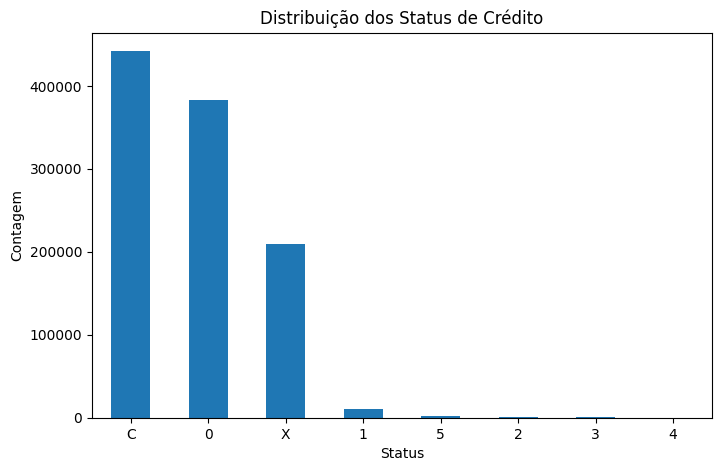

In [43]:
# Gráfico de barras para a distribuição da coluna STATUS
plt.figure(figsize=(8, 5))
credit_df['STATUS'].value_counts().plot(kind='bar')
plt.title('Distribuição dos Status de Crédito')
plt.xlabel('Status')
plt.ylabel('Contagem')
plt.xticks(rotation=0)
plt.show()

In [51]:
# Analisar a relação entre FLAG_EMAIL e mau_pagador
# print("\nTabela cruzada entre FLAG_EMAIL e mau_pagador:") # Removido
crosstab_email = pd.crosstab(df_final['FLAG_EMAIL'], df_final['mau_pagador'])
display(crosstab_email)

# Calcular a proporção de mau pagadores para cada categoria de FLAG_EMAIL
# print("\nProporção de mau pagadores por FLAG_EMAIL:") # Removido
crosstab_email_prop = crosstab_email.div(crosstab_email.sum(axis=1), axis=0)
display(crosstab_email_prop)

# Analisar a relação entre FLAG_OWN_CAR_Y e mau_pagador
# print("\nTabela cruzada entre FLAG_OWN_CAR_Y e mau_pagador:") # Removido
crosstab_car = pd.crosstab(df_final['FLAG_OWN_CAR_Y'], df_final['mau_pagador'])
display(crosstab_car)

# Calcular a proporção de mau pagadores para cada categoria de FLAG_OWN_CAR_Y
# print("\nProporção de mau pagadores por FLAG_OWN_CAR_Y:") # Removido
crosstab_car_prop = crosstab_car.div(crosstab_car.sum(axis=1), axis=0)
display(crosstab_car_prop)

# Qual variável é mais poderosa para prever mau = 1
print("\nAnálise de poder preditivo:")
print("Comparando as proporções de mau pagadores:")
print(f"Proporção de mau pagadores quando FLAG_EMAIL é 1 (tem e-mail): {crosstab_email_prop.loc[1, 1]:.4f}")
print(f"Proporção de mau pagadores quando FLAG_EMAIL é 0 (não tem e-mail): {crosstab_email_prop.loc[0, 1]:.4f}")
print(f"Proporção de mau pagadores quando FLAG_OWN_CAR_Y é True (tem carro): {crosstab_car_prop.loc[True, 1]:.4f}")
print(f"Proporção de mau pagadores quando FLAG_OWN_CAR_Y é False (não tem carro): {crosstab_car_prop.loc[False, 1]:.4f}")

# A variável com maior diferença nas proporções de mau pagadores entre suas categorias é potencialmente mais poderosa. # Removido
# print("\nCom base nas proporções, podemos inferir qual variável parece ser mais poderosa para prever 'mau_pagador'.") # Removido

mau_pagador,0.0,1.0
FLAG_EMAIL,,
0,387262,3840
1,47004,451


mau_pagador,0.0,1.0
FLAG_EMAIL,,
0,0.990182,0.009818
1,0.990496,0.009504


mau_pagador,0.0,1.0
FLAG_OWN_CAR_Y,,
False,272737,2722
True,161529,1569


mau_pagador,0.0,1.0
FLAG_OWN_CAR_Y,,
False,0.990118,0.009882
True,0.990380,0.009620



Análise de poder preditivo:
Comparando as proporções de mau pagadores:
Proporção de mau pagadores quando FLAG_EMAIL é 1 (tem e-mail): 0.0095
Proporção de mau pagadores quando FLAG_EMAIL é 0 (não tem e-mail): 0.0098
Proporção de mau pagadores quando FLAG_OWN_CAR_Y é True (tem carro): 0.0096
Proporção de mau pagadores quando FLAG_OWN_CAR_Y é False (não tem carro): 0.0099


**2 - Vamos montar um metadados**

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável.
    Dica:
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis,
        3. conte o número de categorias dessa variável
        4. acumule essa informação de 3. na lista que você criou em 1.
        5. No final, essa lista pode ser atribuída à nossa variável.

In [52]:
# Criar dataframe com nomes e tipos
metadados = pd.DataFrame({
    'variavel': df.columns,
    'tipo_dado': df.dtypes.astype(str)
})

# Criar lista para guardar número de categorias
qtd_categorias = []

# Loop pelas variáveis
for col in df.columns:
    qtd_categorias.append(df[col].nunique())

# Adicionar ao metadados
metadados['qtd_categorias'] = qtd_categorias

display(metadados)

# Remover as linhas de plotagem que geram avisos e mensagens de runtime
# from matplotlib import pyplot as plt
# metadados['qtd_categorias'].plot(kind='hist', bins=20, title='qtd_categorias')
# plt.gca().spines[['top', 'right',]].set_visible(False)
# from matplotlib import pyplot as plt
# import seaborn as sns
# metadados.groupby('tipo_dado').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
# plt.gca().spines[['top', 'right',]].set_visible(False)
# from matplotlib import pyplot as plt
# metadados['qtd_categorias'].plot(kind='line', figsize=(8, 4), title='qtd_categorias')
# plt.gca().spines[['top', 'right']].set_visible(False)
# from matplotlib import pyplot as plt
# import seaborn as sns
# figsize = (12, 1.2 * len(metadados['tipo_dado'].unique()))
# plt.figure(figsize=figsize)
# sns.violinplot(metadados, x='qtd_categorias', y='tipo_dado', inner='stick', palette='Dark2')
# sns.despine(top=True, right=True, bottom=True, left=True)

,variavel,tipo_dado,qtd_categorias
ID,ID,int64,438510
CODE_GENDER,CODE_GENDER,object,2
FLAG_OWN_CAR,FLAG_OWN_CAR,object,2
FLAG_OWN_REALTY,FLAG_OWN_REALTY,object,2
CNT_CHILDREN,CNT_CHILDREN,int64,12
AMT_INCOME_TOTAL,AMT_INCOME_TOTAL,float64,866
NAME_INCOME_TYPE,NAME_INCOME_TYPE,object,5
NAME_EDUCATION_TYPE,NAME_EDUCATION_TYPE,object,5
NAME_FAMILY_STATUS,NAME_FAMILY_STATUS,object,5
NAME_HOUSING_TYPE,NAME_HOUSING_TYPE,object,6


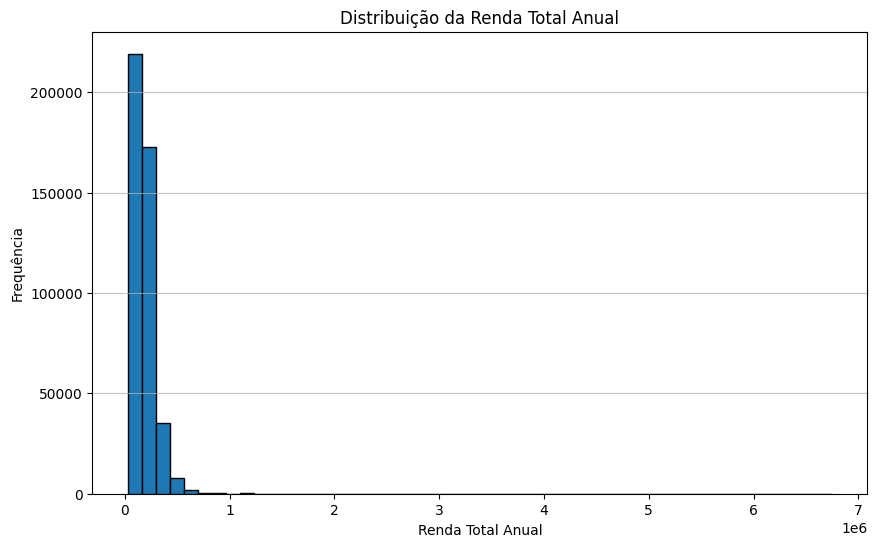

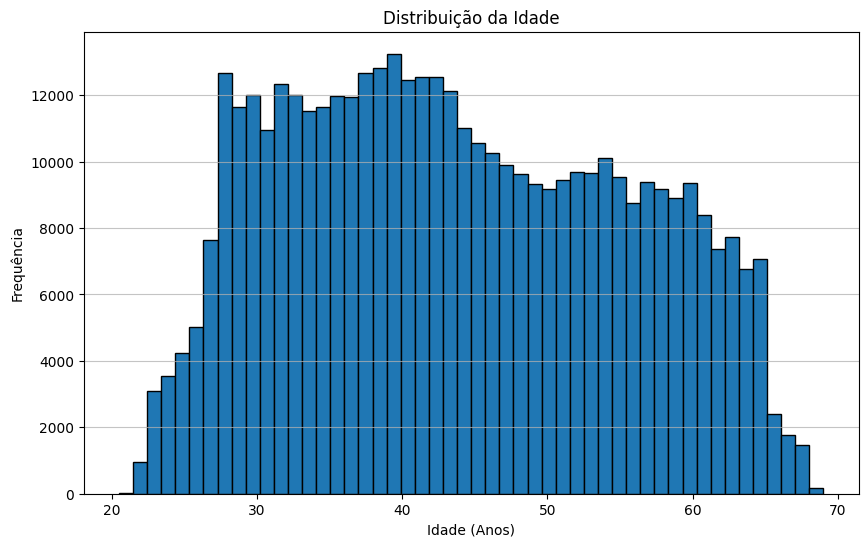

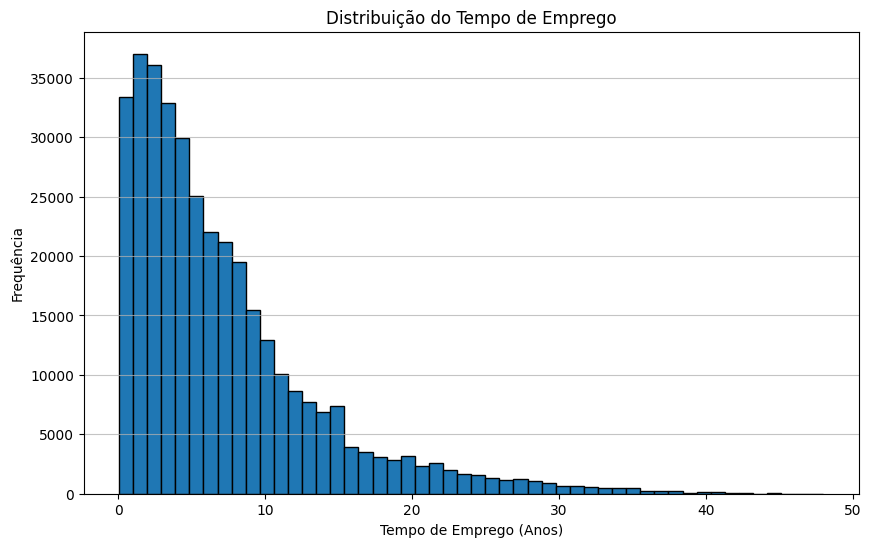

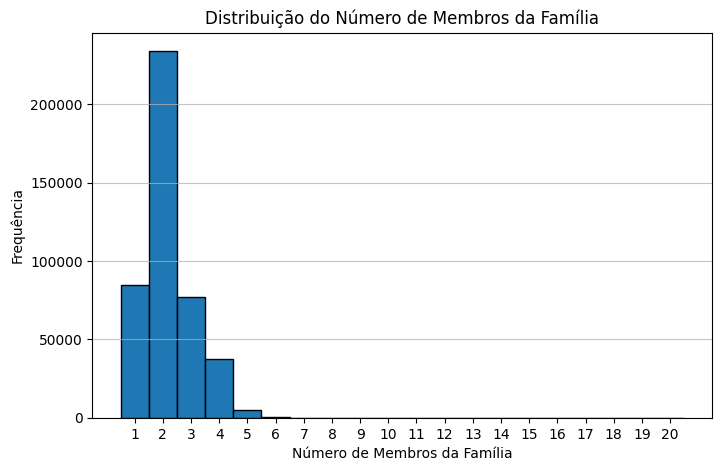

In [44]:
import matplotlib.pyplot as plt

# Histograma para AMT_INCOME_TOTAL
plt.figure(figsize=(10, 6))
plt.hist(df_final['AMT_INCOME_TOTAL'], bins=50, edgecolor='k')
plt.title('Distribuição da Renda Total Anual')
plt.xlabel('Renda Total Anual')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Histograma para DAYS_BIRTH
plt.figure(figsize=(10, 6))
# Convertendo DAYS_BIRTH para anos para melhor interpretação (dividir por -365.25)
plt.hist(df_final['DAYS_BIRTH'] / -365.25, bins=50, edgecolor='k')
plt.title('Distribuição da Idade')
plt.xlabel('Idade (Anos)')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Histograma para DAYS_EMPLOYED
plt.figure(figsize=(10, 6))
# Lidando com o valor atípico 365243 (sem emprego) e convertendo para anos
df_employed_years = df_final['DAYS_EMPLOYED'].replace({365243: np.nan}) / -365.25
plt.hist(df_employed_years.dropna(), bins=50, edgecolor='k')
plt.title('Distribuição do Tempo de Emprego')
plt.xlabel('Tempo de Emprego (Anos)')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)
plt.show()


# Histograma para CNT_FAM_MEMBERS
plt.figure(figsize=(8, 5))
plt.hist(df_final['CNT_FAM_MEMBERS'], bins=range(int(df_final['CNT_FAM_MEMBERS'].min()), int(df_final['CNT_FAM_MEMBERS'].max()) + 2), edgecolor='k', align='left')
plt.title('Distribuição do Número de Membros da Família')
plt.xlabel('Número de Membros da Família')
plt.ylabel('Frequência')
plt.xticks(range(int(df_final['CNT_FAM_MEMBERS'].min()), int(df_final['CNT_FAM_MEMBERS'].max()) + 1))
plt.grid(axis='y', alpha=0.75)
plt.show()


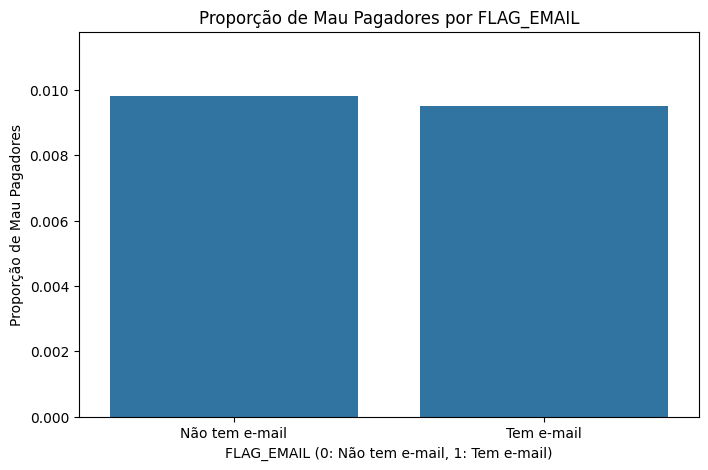

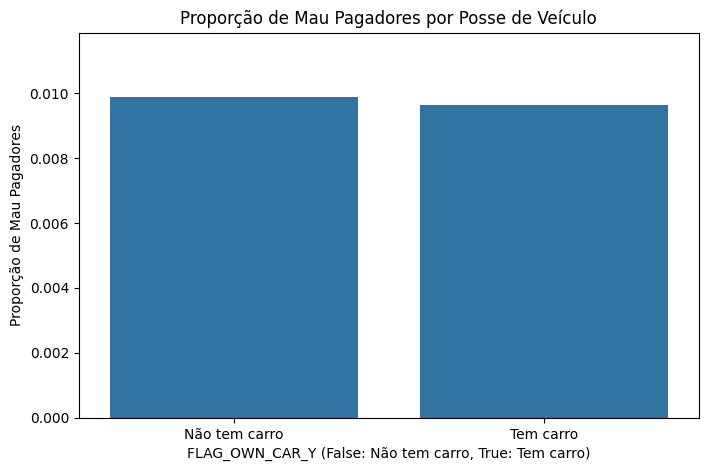

In [19]:
# Criar gráfico para a proporção de mau pagadores por FLAG_EMAIL
plt.figure(figsize=(8, 5))
sns.barplot(x=crosstab_email_prop.index, y=crosstab_email_prop[1.0])
plt.title('Proporção de Mau Pagadores por FLAG_EMAIL')
plt.xlabel('FLAG_EMAIL (0: Não tem e-mail, 1: Tem e-mail)')
plt.ylabel('Proporção de Mau Pagadores')
plt.xticks([0, 1], ['Não tem e-mail', 'Tem e-mail'])
plt.ylim(0, crosstab_email_prop[1.0].max() * 1.2) # Ajustar limite do eixo y para melhor visualização
plt.show()

# Criar gráfico para a proporção de mau pagadores por FLAG_OWN_CAR_Y
plt.figure(figsize=(8, 5))
sns.barplot(x=crosstab_car_prop.index, y=crosstab_car_prop[1.0])
plt.title('Proporção de Mau Pagadores por Posse de Veículo')
plt.xlabel('FLAG_OWN_CAR_Y (False: Não tem carro, True: Tem carro)')
plt.ylabel('Proporção de Mau Pagadores')
plt.xticks([False, True], ['Não tem carro', 'Tem carro'])
plt.ylim(0, crosstab_car_prop[1.0].max() * 1.2) # Ajustar limite do eixo y para melhor visualização
plt.show()

**3 - Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.**

In [20]:
# Identificar variáveis categóricas
cat_vars = df.select_dtypes(include='object').columns
print("Variáveis categóricas:", list(cat_vars))

# Criar dummies (excluindo uma categoria para evitar multicolinearidade)
df_dummies = pd.get_dummies(df, columns=cat_vars, drop_first=True)

display(df_dummies.head())
print("\nNovo formato da base:", df_dummies.shape)

Variáveis categóricas: ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']


,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,5008804,0,427500.0,-12005,-4542,1,1,0,0,2.0,...,False,False,False,False,False,False,False,False,False,False
1,5008805,0,427500.0,-12005,-4542,1,1,0,0,2.0,...,False,False,False,False,False,False,False,False,False,False
2,5008806,0,112500.0,-21474,-1134,1,0,0,0,2.0,...,False,False,False,False,False,False,False,False,True,False
3,5008808,0,270000.0,-19110,-3051,1,0,1,1,1.0,...,False,False,False,False,False,False,True,False,False,False
4,5008809,0,270000.0,-19110,-3051,1,0,1,1,1.0,...,False,False,False,False,False,False,True,False,False,False



Novo formato da base: (438557, 47)


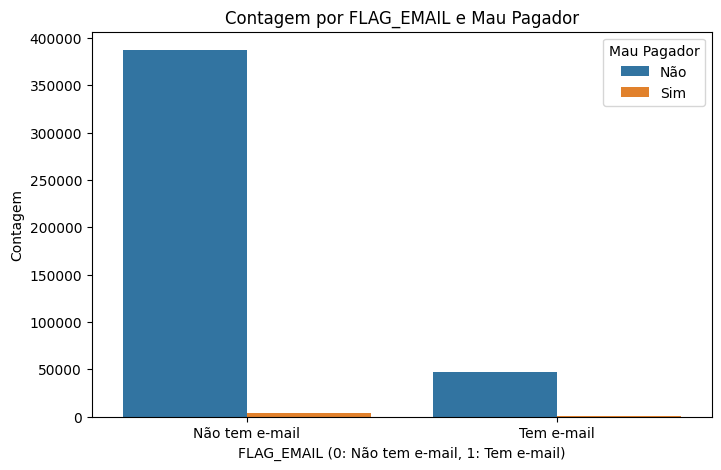

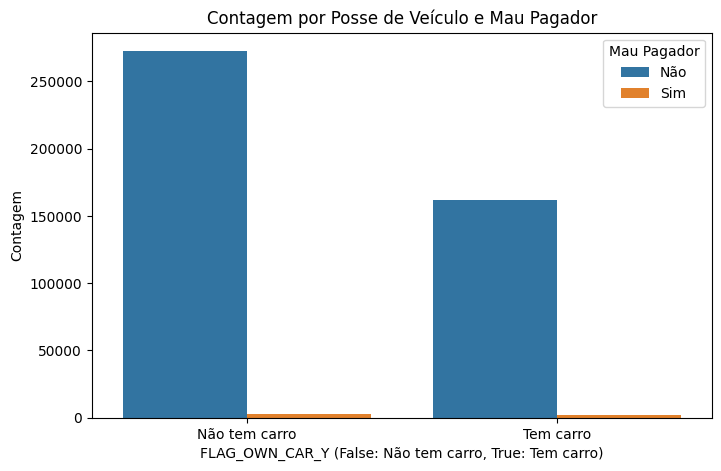

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de contagem para FLAG_EMAIL vs mau_pagador
plt.figure(figsize=(8, 5))
sns.countplot(data=df_final, x='FLAG_EMAIL', hue='mau_pagador')
plt.title('Contagem por FLAG_EMAIL e Mau Pagador')
plt.xlabel('FLAG_EMAIL (0: Não tem e-mail, 1: Tem e-mail)')
plt.ylabel('Contagem')
plt.xticks([0, 1], ['Não tem e-mail', 'Tem e-mail'])
plt.legend(title='Mau Pagador', labels=['Não', 'Sim'])
plt.show()

# Gráfico de contagem para FLAG_OWN_CAR_Y vs mau_pagador
plt.figure(figsize=(8, 5))
sns.countplot(data=df_final, x='FLAG_OWN_CAR_Y', hue='mau_pagador')
plt.title('Contagem por Posse de Veículo e Mau Pagador')
plt.xlabel('FLAG_OWN_CAR_Y (False: Não tem carro, True: Tem carro)')
plt.ylabel('Contagem')
plt.xticks([False, True], ['Não tem carro', 'Tem carro'])
plt.legend(title='Mau Pagador', labels=['Não', 'Sim'])
plt.show()

In [47]:
# 1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
metadata = pd.DataFrame({'nome_variavel': df.columns, 'tipo_dado': df.dtypes})

# 2. Adicione uma coluna nesse dataframe chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável.
qtd_categorias_lista = []
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'category':
        qtd_categorias_lista.append(df[col].nunique())
    else:
        qtd_categorias_lista.append(None) # ou 0, dependendo de como quer representar para variáveis não categóricas

metadata['qtd_categorias'] = qtd_categorias_lista

display(metadata)

,nome_variavel,tipo_dado,qtd_categorias
ID,ID,int64,NaN
CODE_GENDER,CODE_GENDER,object,2.0
FLAG_OWN_CAR,FLAG_OWN_CAR,object,2.0
FLAG_OWN_REALTY,FLAG_OWN_REALTY,object,2.0
CNT_CHILDREN,CNT_CHILDREN,int64,NaN
AMT_INCOME_TOTAL,AMT_INCOME_TOTAL,float64,NaN
NAME_INCOME_TYPE,NAME_INCOME_TYPE,object,5.0
NAME_EDUCATION_TYPE,NAME_EDUCATION_TYPE,object,5.0
NAME_FAMILY_STATUS,NAME_FAMILY_STATUS,object,5.0
NAME_HOUSING_TYPE,NAME_HOUSING_TYPE,object,6.0


In [35]:
# Mostrar tabela cruzada de contagem para FLAG_EMAIL e mau_pagador
print("Tabela cruzada de Contagem: FLAG_EMAIL vs mau_pagador")
display(crosstab_email)

# Mostrar tabela de proporção para FLAG_EMAIL e mau_pagador
print("\nTabela de Proporção: FLAG_EMAIL vs mau_pagador")
display(crosstab_email_prop)

# Mostrar tabela cruzada de contagem para FLAG_OWN_CAR_Y e mau_pagador
print("\nTabela cruzada de Contagem: FLAG_OWN_CAR_Y vs mau_pagador")
display(crosstab_car)

# Mostrar tabela de proporção para FLAG_OWN_CAR_Y e mau_pagador
print("\nTabela de Proporção: FLAG_OWN_CAR_Y vs mau_pagador")
display(crosstab_car_prop)

Tabela cruzada de Contagem: FLAG_EMAIL vs mau_pagador


mau_pagador,0.0,1.0
FLAG_EMAIL,,
0,387262,3840
1,47004,451



Tabela de Proporção: FLAG_EMAIL vs mau_pagador


mau_pagador,0.0,1.0
FLAG_EMAIL,,
0,0.990182,0.009818
1,0.990496,0.009504



Tabela cruzada de Contagem: FLAG_OWN_CAR_Y vs mau_pagador


mau_pagador,0.0,1.0
FLAG_OWN_CAR_Y,,
False,272737,2722
True,161529,1569



Tabela de Proporção: FLAG_OWN_CAR_Y vs mau_pagador


mau_pagador,0.0,1.0
FLAG_OWN_CAR_Y,,
False,0.990118,0.009882
True,0.990380,0.009620


In [33]:
# Mostrar a tabela cruzada para FLAG_EMAIL e mau_pagador
display(crosstab_email)

mau_pagador,0.0,1.0
FLAG_EMAIL,,
0,387262,3840
1,47004,451


**4 - Qual variável é mais poderosa?**

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

In [26]:
# Tabelas cruzadas com proporção de maus pagadores
# Usando df_final, onde 'mau_pagador' e as variáveis dummy estão disponíveis
tabela_email = pd.crosstab(df_final['FLAG_EMAIL'], df_final['mau_pagador'], normalize='index') * 100
tabela_veiculo = pd.crosstab(df_final['FLAG_OWN_CAR_Y'], df_final['mau_pagador'], normalize='index') * 100

print(" Proporção de 'mau' por 'possui_email':\n", tabela_email)
print("\n Proporção de 'mau' por 'posse_de_veiculo':\n", tabela_veiculo)

 Proporção de 'mau' por 'possui_email':
 mau_pagador        0.0       1.0
FLAG_EMAIL                      
0            99.018159  0.981841
1            99.049626  0.950374

 Proporção de 'mau' por 'posse_de_veiculo':
 mau_pagador           0.0       1.0
FLAG_OWN_CAR_Y                     
False           99.011831  0.988169
True            99.038002  0.961998


In [36]:
# Obter a contagem de cada valor na variável 'mau_pagador'
distribuicao_mau_contagem = df_final['mau_pagador'].value_counts().reset_index()
distribuicao_mau_contagem.columns = ['Mau Pagador', 'Contagem']

# Obter a proporção de cada valor na variável 'mau_pagador'
distribuicao_mau_proporcao = df_final['mau_pagador'].value_counts(normalize=True).reset_index()
distribuicao_mau_proporcao.columns = ['Mau Pagador', 'Proporção']

# Juntar as duas tabelas para uma visualização completa
distribuicao_mau_tabela = pd.merge(distribuicao_mau_contagem, distribuicao_mau_proporcao, on='Mau Pagador')

print("Distribuição da Variável Resposta 'mau_pagador':")
display(distribuicao_mau_tabela)

Distribuição da Variável Resposta 'mau_pagador':


,Mau Pagador,Contagem,Proporção
0,0.0,434266,0.990216
1,1.0,4291,0.009784


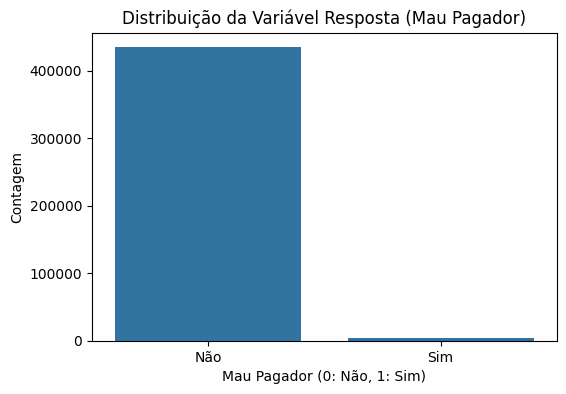

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar a distribuição da variável resposta 'mau_pagador'
plt.figure(figsize=(6, 4))
sns.countplot(data=df_final, x='mau_pagador')
plt.title('Distribuição da Variável Resposta (Mau Pagador)')
plt.xlabel('Mau Pagador (0: Não, 1: Sim)')
plt.ylabel('Contagem')
plt.xticks([0, 1], ['Não', 'Sim'])
plt.show()

**5 - Salve a base, pois ela será utilizada no final deste módulo.**

In [28]:
# Salvar base preparada para o scikit-learn
df_dummies.to_csv('demo01_preparada.csv', index=False)
print(" Base salva como 'demo01_preparada.csv'")

 Base salva como 'demo01_preparada.csv'
